Student number: 24206493

### Assignment 2: Embeddings

#### Task 1: Baseline using CountVectorizer and Logistic Regression Classifier


Importing all the required libraries for Task 1, will import others as an when needed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

Converting the CSV file into a dataframe and viewing its elements to see what I am going to be working with.

In [2]:
df = pd.read_csv("BBC_news.csv") 

In [3]:
df.head(10)

,Text,Class
0,Hariri killing hits Beirut shares Shares in S...,business
1,Asian banks halt dollar's slide The dollar re...,business
2,Housewives lift Channel 4 ratings The debut o...,entertainment
3,Portable PlayStation ready to go Sony's PlayS...,tech
4,Georgia plans hidden asset pardon Georgia is ...,business
5,German music in a 'zombie' state The German m...,entertainment
6,Dent continues Adelaide progress American Tay...,sport
7,Tory 'stalking horse' Meyer dies Sir Anthony ...,politics
8,Nadal marches on in Mexico Rafael Nadal conti...,sport
9,Fannie Mae 'should restate books' US mortgage...,business


The features are supposed to be extracted from the words, so the words are likely represented in a format that makes it easy to classify them under a label. From the CountVectorization page on scikit-learn, I understood that this function is used to create numerical vectors from words by counting the repetitions of each word. For example, if the sentences are "This is great" or "Is this great?", this algorithm would represent them as similar vectors. The ordering of the sentences, identifying a word used in different contexts, or determining if words are similar to each other might not be its priority.

Beginning by splitting my data into training and testing sets to prevent any leakages that might lead to inflated accuracy estimates later, I have chosen to keep 25% of the data for testing throughout my experiments.

In [4]:
X = df['Text'].tolist()
y = df['Class'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42, stratify=y)

I am going to be using a Pipeline + GridSearch approach where I am hardcoding only a couple of things related to the Log Reg classifier, such as:

1. max_iter = 100; I tried to let this hyperparameter go through the grid search; however, the process became too lengthy with too many warnings about convergence. 100, which is the default, seemed to be the best bet after trying 200, 300, 500, etc.

2. solver = 'liblinear'; the same story as above. I tried to import a warning function to ignore them, but that didn't work either. I am not entirely sure what the issue is here. Also, I read on scikit-learn that 'liblinear' works best for smaller datasets compared to 'lbfgs' and 'saga', so I went ahead with it.

3. I also tried to play around with penalties; in all my test cases, l2 seemed to work best, and it's also a default, so I didn't specify it in my final code below.

For the CountVectoriser, I wanted to see the effect of a)max features and b)ngram range on its accuracy. Using more features and bigrams along with unigrams should increase the accuracy as the training set will have more text to draw both repetitions and a bit of context(ngrams could with this) as well.

Fitting the pipeline and the grid using GridSearchCV on the training data.

In [5]:
# import warnings 
# warnings.filterwarnings('ignore')
txtpipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression(max_iter = 100, solver = 'liblinear'))])

#setting up the grid to get the params the work best with our classifier for higher accuracy
param_grid = {
    'vectorizer__max_features': [None, 1000, 5000, 10000], #this file has >14000 features
    'vectorizer__ngram_range': [(1,1), (1,2), (2,2)], 

    #ngrams seem to be an effort of CountVectorisation to capture the order/context around the words,trying to see if they can help with accuracy

}

grid_search = GridSearchCV(txtpipe,param_grid,cv=5,scoring='accuracy',n_jobs=-1,verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'vectorizer__max_features': [None, 1000, 5000, 10000],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)]},
             scoring='accuracy', verbose=2)

Finding the best parameters after fitting the train data on the basis of accuracy on the classifier

In [8]:
print("Best parameters found:")
print(grid_search.best_params_)

Best parameters found:
{'vectorizer__max_features': 10000, 'vectorizer__ngram_range': (1, 2)}


In [9]:
CountVscores_df = pd.DataFrame(grid_search.cv_results_)

Checking the all the results from the grid search and ranking them by their accuracy scores.

In [10]:
CountVscores_df = CountVscores_df.sort_values(by=['rank_test_score']).reset_index(drop='index')

In [11]:
CountVscores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vectorizer__max_features,param_vectorizer__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.635831,0.121264,0.039205,0.002265,10000,"(1, 2)","{'vectorizer__max_features': 10000, 'vectorize...",0.940476,0.879518,0.939759,0.927711,0.879518,0.913396,0.028031,1
1,0.581224,0.059588,0.034142,0.001128,5000,"(1, 2)","{'vectorizer__max_features': 5000, 'vectorizer...",0.940476,0.879518,0.939759,0.927711,0.867470,0.910987,0.031181,2
2,0.971065,0.114573,0.043677,0.005381,None,"(1, 2)","{'vectorizer__max_features': None, 'vectorizer...",0.928571,0.879518,0.939759,0.915663,0.879518,0.908606,0.024945,3
3,0.196002,0.021366,0.036366,0.000915,5000,"(1, 1)","{'vectorizer__max_features': 5000, 'vectorizer...",0.940476,0.867470,0.939759,0.915663,0.867470,0.906168,0.032835,4
4,0.229893,0.007837,0.029624,0.007728,10000,"(1, 1)","{'vectorizer__max_features': 10000, 'vectorize...",0.928571,0.867470,0.939759,0.915663,0.867470,0.903787,0.030617,5
5,0.240573,0.004186,0.036641,0.002063,None,"(1, 1)","{'vectorizer__max_features': None, 'vectorizer...",0.928571,0.867470,0.939759,0.915663,0.867470,0.903787,0.030617,5
6,0.692723,0.130751,0.030425,0.002349,None,"(2, 2)","{'vectorizer__max_features': None, 'vectorizer...",0.916667,0.879518,0.855422,0.891566,0.903614,0.889357,0.020988,7
7,0.652220,0.098845,0.038183,0.010099,1000,"(1, 2)","{'vectorizer__max_features': 1000, 'vectorizer...",0.928571,0.843373,0.915663,0.891566,0.855422,0.886919,0.033079,8
8,0.526380,0.087293,0.027808,0.004244,10000,"(2, 2)","{'vectorizer__max_features': 10000, 'vectorize...",0.904762,0.867470,0.855422,0.903614,0.891566,0.884567,0.019806,9
9,0.447408,0.036259,0.028351,0.006055,5000,"(2, 2)","{'vectorizer__max_features': 5000, 'vectorizer...",0.892857,0.867470,0.843373,0.903614,0.903614,0.882186,0.023474,10


Across our 5‑fold CV grid search over vocabulary size (max_features), and n‑gram range, the best configuration for the hyperparameters has been:
- max_features = 10000, ngram_range = (1, 2)

ngram range of (1,2) is a consistent parameter in the top five configrations. This setting achieved a mean CV accuracy of 0.9134 (std ≈ 0.0280), placing it 1st out of 12 candidates.

Accuracy: 0.935251798561151
Classification Report:
                precision    recall  f1-score   support

     business       0.93      0.93      0.93        30
entertainment       0.91      0.88      0.89        24
     politics       0.96      0.96      0.96        26
        sport       0.94      1.00      0.97        33
         tech       0.92      0.88      0.90        26

     accuracy                           0.94       139
    macro avg       0.93      0.93      0.93       139
 weighted avg       0.93      0.94      0.93       139



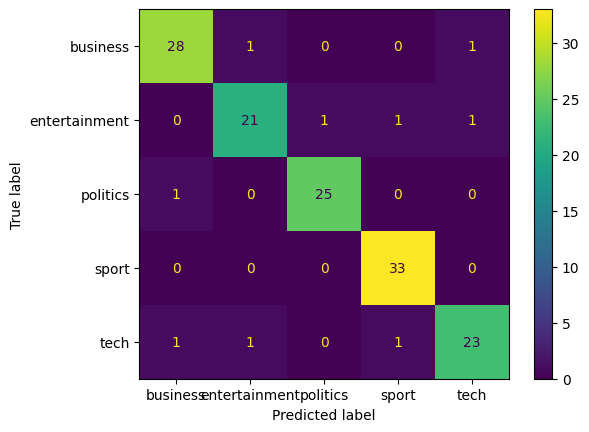

In [12]:
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix ,display_labels=grid_search.classes_)
disp.plot()

plt.show()

#### Main Findings:

1. ~94% accuracy on the predictions using CountVectorizer.

2. Vocabulary size: Allowing up to 10000 features outperformed no limit and 5000.

3. N‑grams: Including bigrams (ngram_range=(1,2)) consistently yielded top performance.


#### Task 2: Doc2vec

Repeating the same process for Doc2Vec. ChatGPT suggested to create a class if I had to conduct a GS. It seamlessly got intergrated with the pipleine and GS feature selection process.

In [13]:
#!pip install gensim
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.base import BaseEstimator, TransformerMixin

In [14]:
class Doc2VecTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vector_size=50, window=5, min_count=2, epochs=20, seed=42, workers=4, dm = 1):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.epochs = epochs
        self.seed = seed
        self.workers = workers
        self.dm = dm

    def fit(self, X, y=None):
        tagged = [
            TaggedDocument(words=doc.split(), tags=[i])
            for i, doc in enumerate(X)
        ]
        self.model_ = Doc2Vec(
            vector_size=self.vector_size,
            window=self.window,
            min_count=self.min_count,
            workers=self.workers,
            epochs=self.epochs,
            seed=self.seed, 
            dm = self.dm
        )
        self.model_.build_vocab(tagged)
        self.model_.train(tagged,
                          total_examples=len(tagged),
                          epochs=self.epochs)
        return self

    def transform(self, X):
        return np.array([
            self.model_.infer_vector(doc.split())
            for doc in X
        ])

For the param grid for Doc2Vec, I tried to check with hyper-parameters such as:
1. dm that defines the training algorithm. If dm=1, ‘distributed memory’ (PV-DM) is used. Otherwise, distributed bag of words (PV-DBOW) is employed. This helps with preserving the order/context of the words in which they appear by creating a paragraph vectors  
2. Vector size which takes care of the dimensionality of the feature vectors
3. window is how many words can be used to tune the maximum distance between the current and predicted word within a sentence
4. min_count that ignores all words with total frequency lower than the integer its initialised with
5. Epochs that figures the number of iterations (epochs) over the corpus. Defaults to 10 for Doc2Vec.

I will be running a 3 fold CV for Doc2Vec as its computationally heavy.

In [15]:
pipe = Pipeline([
    ('d2v', Doc2VecTransformer()),
    ('clf', LogisticRegression(max_iter=100, solver = 'liblinear'))
])
param_grid = {
    'd2v__dm': [0, 1],
    'd2v__vector_size': [16, 32, 64, 128],
    'd2v__window': [2, 3, 5, 7],
    'd2v__min_count': [1, 2, 3, 4],
    'd2v__epochs': [20, 40, 60, 80],

}

grid = GridSearchCV( estimator=pipe, param_grid=param_grid,cv=3,scoring='accuracy',n_jobs=-1,verbose=2)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 512 candidates, totalling 1536 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('d2v', Doc2VecTransformer()),
                                       ('clf',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'d2v__dm': [0, 1], 'd2v__epochs': [20, 40, 60, 80],
                         'd2v__min_count': [1, 2, 3, 4],
                         'd2v__vector_size': [16, 32, 64, 128],
                         'd2v__window': [2, 3, 5, 7]},
             scoring='accuracy', verbose=2)

In [16]:
print("Best parameters found:")
print(grid.best_params_)

Best parameters found:
{'d2v__dm': 0, 'd2v__epochs': 60, 'd2v__min_count': 1, 'd2v__vector_size': 128, 'd2v__window': 2}


In [17]:
D2Vscores_df = pd.DataFrame(grid.cv_results_)
D2Vscores_df = D2Vscores_df.sort_values(by=['rank_test_score']).reset_index(drop='index')
D2Vscores_df.head(10)	

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_d2v__dm,param_d2v__epochs,param_d2v__min_count,param_d2v__vector_size,param_d2v__window,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,26.378001,3.214738,5.828730,0.705659,0,60,1,128,2,"{'d2v__dm': 0, 'd2v__epochs': 60, 'd2v__min_co...",0.964029,0.949640,0.963768,0.959146,0.006722,1
1,26.332565,1.402620,5.600957,0.682336,0,80,2,128,5,"{'d2v__dm': 0, 'd2v__epochs': 80, 'd2v__min_co...",0.964029,0.935252,0.971014,0.956765,0.015477,2
2,25.530761,2.222982,5.323239,0.527800,0,60,1,128,5,"{'d2v__dm': 0, 'd2v__epochs': 60, 'd2v__min_co...",0.964029,0.942446,0.963768,0.956748,0.010113,3
3,18.610583,1.266181,4.227626,0.415585,0,40,1,128,5,"{'d2v__dm': 0, 'd2v__epochs': 40, 'd2v__min_co...",0.949640,0.956835,0.963768,0.956748,0.005768,3
4,17.099592,1.906534,3.994493,0.829115,0,60,4,128,2,"{'d2v__dm': 0, 'd2v__epochs': 60, 'd2v__min_co...",0.956835,0.949640,0.963768,0.956748,0.005768,3
5,20.067622,2.008668,4.167562,0.257446,0,60,2,128,2,"{'d2v__dm': 0, 'd2v__epochs': 60, 'd2v__min_co...",0.956835,0.949640,0.963768,0.956748,0.005768,3
6,14.378324,0.147223,2.880401,0.260604,0,40,2,128,2,"{'d2v__dm': 0, 'd2v__epochs': 40, 'd2v__min_co...",0.949640,0.956835,0.963768,0.956748,0.005768,3
7,14.614810,0.252249,3.721893,0.047511,0,40,2,128,5,"{'d2v__dm': 0, 'd2v__epochs': 40, 'd2v__min_co...",0.964029,0.949640,0.956522,0.956730,0.005876,8
8,21.987148,0.582150,5.478474,0.346532,0,80,4,128,2,"{'d2v__dm': 0, 'd2v__epochs': 80, 'd2v__min_co...",0.971223,0.942446,0.956522,0.956730,0.011749,8
9,17.432954,1.504437,4.009582,0.228254,0,60,3,128,2,"{'d2v__dm': 0, 'd2v__epochs': 60, 'd2v__min_co...",0.971223,0.942446,0.956522,0.956730,0.011749,8


Across our 3‑fold CV grid search overdm, vector size, window, min_count, and epochs, the best configuration for the hyperparameters has been:
DM = 0, Vector size = 128, window = 2, min_count = 1, epochs = 60

Top models used dm = 0, meaning PV-DBOW worked better than PV-DM and vector size of 128 is a consistent parameter in the top four configrations. This setting achieved a mean test accuracy of 0.959 (std ≈ 0.0006), placing it 1st out of 512 candidates. The CV process ended up being extremely computationally heavy for me in the hindsight.

Doc2Vec + Logistic Regression Accuracy: 0.9568345323741008
Classification Report:
                precision    recall  f1-score   support

     business       0.97      0.97      0.97        30
entertainment       0.96      0.96      0.96        24
     politics       0.93      0.96      0.94        26
        sport       1.00      1.00      1.00        33
         tech       0.92      0.88      0.90        26

     accuracy                           0.96       139
    macro avg       0.95      0.95      0.95       139
 weighted avg       0.96      0.96      0.96       139



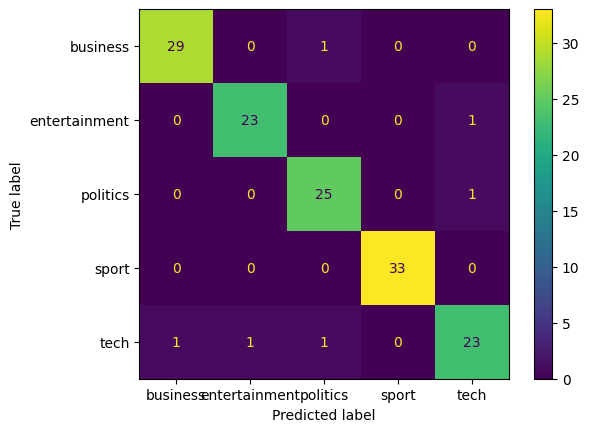

In [18]:
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Doc2Vec + Logistic Regression Accuracy:", accuracy)
print("Classification Report:\n", report)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot()
plt.show()

#### Main Findings:

1. ~96% accuracy on the predictions using Count2Vec.

2. Higher vector_size (128) is works the best. It is able to capture more information and create patterns.

3. Top models used dm = 0, meaning PV-DBOW worked better than PV-DM in this task.

4. Increasing epochs to 60 helped the model learn better document embeddings.
   
5. A higher min_count (e.g., 2 or 3) showed slightly lower mean accuracy compared to min_count=1. Keeping all the words is working better for the model

7. Small window size (2) is performing better than a larger one (5) which means immediate neighbors are more important to perdict the document class.


#### Task 3: Using BERT for NLP

Repeating the same process for BERT using GS and 3-fold cross val to find best parameters after producing embeddings.

In [19]:
from sklearn.base import BaseEstimator, ClassifierMixin
from datasets import Dataset
import torch
from transformers import (BertTokenizer,BertForSequenceClassification,TrainingArguments,Trainer)

df = pd.read_csv("BBC_news.csv")


train_df, test_df = train_test_split(df, test_size=0.25, random_state=42, stratify=df["Class"])
# map string labels to ints
label_to_id = {lbl: i for i, lbl in enumerate(train_df["Class"].unique())}
train_df["label"] = train_df["Class"].map(label_to_id)

X_train = train_df["Text"].tolist()
y_train = train_df["label"].tolist()

num_labels = len(label_to_id)

In [20]:
class BertClassifier(BaseEstimator, ClassifierMixin):
    def __init__(
        self,
        learning_rate: float = 2e-5,
        num_train_epochs: int = 3,
        batch_size: int = 8,
        max_length: int = 128,
        model_name: str = "bert-base-uncased",
    ):
        self.learning_rate = learning_rate
        self.num_train_epochs = num_train_epochs
        self.batch_size = batch_size
        self.max_length = max_length
        self.model_name = model_name
        self.tokenizer = BertTokenizer.from_pretrained(self.model_name)

    def fit(self, X, y):
        toks = self.tokenizer(
            X,
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="np",
        )
        ds = Dataset.from_dict({
            "input_ids": toks["input_ids"].tolist(),
            "attention_mask": toks["attention_mask"].tolist(),
            "label": y
        })
        ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

        self.model_ = BertForSequenceClassification.from_pretrained(
            self.model_name,
            num_labels=num_labels
        )

        args = TrainingArguments(
            output_dir="./tmp",
            learning_rate=self.learning_rate,
            per_device_train_batch_size=self.batch_size,
            per_device_eval_batch_size=self.batch_size,
            num_train_epochs=self.num_train_epochs,
            logging_steps=50,
            logging_dir=None,
            save_strategy="no",
           # evaluation_strategy="no",
            report_to=None,
        )

        trainer = Trainer(
            model=self.model_,
            args=args,
            train_dataset=ds,
            tokenizer=self.tokenizer,
        )
        trainer.train()
        self.trainer_ = trainer
        return self

    def predict(self, X):
        toks = self.tokenizer(
            X,
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="np",
        )
        ds = Dataset.from_dict({
            "input_ids": toks["input_ids"].tolist(),
            "attention_mask": toks["attention_mask"].tolist(),
        })
        ds.set_format(type="torch", columns=["input_ids", "attention_mask"])

        preds = self.trainer_.predict(ds).predictions
        return np.argmax(preds, axis=1)

    def score(self, X, y):
        preds = self.predict(X)
        return accuracy_score(y, preds)


For the param grid for BERT, I checked with hyper-parameters such as:

1. learning_rate: Controls the step size for updating model weights during fine-tuning. Tested values: 2×10⁻⁵, 3×10⁻⁵, 5×10⁻⁵
2. batch_size : Number of examples processed in one go. Tested values: 2, 4, 6
3. num_train_epochs: Number of iterations (epochs) over the corpus. Tested values: 2, 3, 4

Others are set to default values such as max_length (used 128) that gives max tokens per example, model_name (I used "bert-base-uncased") which specifies pre-trained BERT variant loaded for tuning.

In [26]:
param_grid = {
    "learning_rate": [2e-5, 3e-5, 5e-5],
    "batch_size": [2, 4, 6],
    "num_train_epochs": [2, 3, 4],
}

bert_clf = BertClassifier()
grid = GridSearchCV(
    estimator=bert_clf,
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,            # 3‑fold CV
    verbose=2,
    n_jobs=1        
)

grid.fit(X_train, y_train)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.300800
100,0.715100


[CV] END batch_size=2, learning_rate=2e-05, num_train_epochs=2; total time=  20.0s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.388000
100,0.751000


[CV] END batch_size=2, learning_rate=2e-05, num_train_epochs=2; total time=  19.9s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.339700
100,0.751100


[CV] END batch_size=2, learning_rate=2e-05, num_train_epochs=2; total time=  20.2s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.333300
100,0.752600
150,0.485100
200,0.275200


[CV] END batch_size=2, learning_rate=2e-05, num_train_epochs=3; total time=  27.7s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.422400
100,0.828000
150,0.452600
200,0.263900


[CV] END batch_size=2, learning_rate=2e-05, num_train_epochs=3; total time=  27.7s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.402600
100,0.827000
150,0.450200
200,0.245800


[CV] END batch_size=2, learning_rate=2e-05, num_train_epochs=3; total time=  27.7s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.437200
100,0.757900
150,0.348600
200,0.127100
250,0.066300


[CV] END batch_size=2, learning_rate=2e-05, num_train_epochs=4; total time=  35.2s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.336600
100,0.618700
150,0.274900
200,0.096900
250,0.036900


[CV] END batch_size=2, learning_rate=2e-05, num_train_epochs=4; total time=  35.5s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.344900
100,0.600100
150,0.212800
200,0.070200
250,0.031600


[CV] END batch_size=2, learning_rate=2e-05, num_train_epochs=4; total time=  35.7s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.198100
100,0.421700


[CV] END batch_size=2, learning_rate=3e-05, num_train_epochs=2; total time=  19.8s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.276900
100,0.499700


[CV] END batch_size=2, learning_rate=3e-05, num_train_epochs=2; total time=  20.3s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.191200
100,0.485300


[CV] END batch_size=2, learning_rate=3e-05, num_train_epochs=2; total time=  20.0s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.268600
100,0.552600
150,0.238200
200,0.085300


[CV] END batch_size=2, learning_rate=3e-05, num_train_epochs=3; total time=  27.7s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.240200
100,0.456000
150,0.202400
200,0.072800


[CV] END batch_size=2, learning_rate=3e-05, num_train_epochs=3; total time=  27.4s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.320100
100,0.590100
150,0.219200
200,0.067900


[CV] END batch_size=2, learning_rate=3e-05, num_train_epochs=3; total time=  27.8s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.376000
100,0.540200
150,0.147700
200,0.025100
250,0.013000


[CV] END batch_size=2, learning_rate=3e-05, num_train_epochs=4; total time=  36.0s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.209300
100,0.370500
150,0.180500
200,0.037000
250,0.011400


[CV] END batch_size=2, learning_rate=3e-05, num_train_epochs=4; total time=  35.1s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.207300
100,0.348100
150,0.120700
200,0.016600
250,0.010400


[CV] END batch_size=2, learning_rate=3e-05, num_train_epochs=4; total time=  35.8s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.020200
100,0.196500


[CV] END batch_size=2, learning_rate=5e-05, num_train_epochs=2; total time=  20.4s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.079100
100,0.256900


[CV] END batch_size=2, learning_rate=5e-05, num_train_epochs=2; total time=  19.9s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.050500
100,0.255100


[CV] END batch_size=2, learning_rate=5e-05, num_train_epochs=2; total time=  19.8s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.180300
100,0.278000
150,0.067500
200,0.009800


[CV] END batch_size=2, learning_rate=5e-05, num_train_epochs=3; total time=  27.8s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.100900
100,0.235100
150,0.159300
200,0.040900


[CV] END batch_size=2, learning_rate=5e-05, num_train_epochs=3; total time=  27.8s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.127100
100,0.304600
150,0.147500
200,0.013900


[CV] END batch_size=2, learning_rate=5e-05, num_train_epochs=3; total time=  27.4s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.150000
100,0.266600
150,0.129400
200,0.006600
250,0.020100


[CV] END batch_size=2, learning_rate=5e-05, num_train_epochs=4; total time=  35.9s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.050200
100,0.206800
150,0.124200
200,0.021500
250,0.005900


[CV] END batch_size=2, learning_rate=5e-05, num_train_epochs=4; total time=  35.9s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.015900
100,0.174700
150,0.127500
200,0.025300
250,0.004100


[CV] END batch_size=2, learning_rate=5e-05, num_train_epochs=4; total time=  35.3s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.278800


[CV] END batch_size=4, learning_rate=2e-05, num_train_epochs=2; total time=  11.3s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.304300


[CV] END batch_size=4, learning_rate=2e-05, num_train_epochs=2; total time=  11.8s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.306100


[CV] END batch_size=4, learning_rate=2e-05, num_train_epochs=2; total time=  12.1s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.270700
100,0.741100


[CV] END batch_size=4, learning_rate=2e-05, num_train_epochs=3; total time=  15.9s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.339100
100,0.742600


[CV] END batch_size=4, learning_rate=2e-05, num_train_epochs=3; total time=  16.5s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.234900
100,0.636000


[CV] END batch_size=4, learning_rate=2e-05, num_train_epochs=3; total time=  15.9s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.272600
100,0.637300


[CV] END batch_size=4, learning_rate=2e-05, num_train_epochs=4; total time=  20.3s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.254500
100,0.509300


[CV] END batch_size=4, learning_rate=2e-05, num_train_epochs=4; total time=  19.8s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.204000
100,0.415500


[CV] END batch_size=4, learning_rate=2e-05, num_train_epochs=4; total time=  20.3s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.130800


[CV] END batch_size=4, learning_rate=3e-05, num_train_epochs=2; total time=  11.9s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.134500


[CV] END batch_size=4, learning_rate=3e-05, num_train_epochs=2; total time=  12.0s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.188000


[CV] END batch_size=4, learning_rate=3e-05, num_train_epochs=2; total time=  11.9s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.143500
100,0.481700


[CV] END batch_size=4, learning_rate=3e-05, num_train_epochs=3; total time=  16.5s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.196900
100,0.446100


[CV] END batch_size=4, learning_rate=3e-05, num_train_epochs=3; total time=  16.0s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.092500
100,0.322800


[CV] END batch_size=4, learning_rate=3e-05, num_train_epochs=3; total time=  16.4s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.145200
100,0.365800


[CV] END batch_size=4, learning_rate=3e-05, num_train_epochs=4; total time=  20.4s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.108700
100,0.262900


[CV] END batch_size=4, learning_rate=3e-05, num_train_epochs=4; total time=  20.4s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.036600
100,0.196300


[CV] END batch_size=4, learning_rate=3e-05, num_train_epochs=4; total time=  20.5s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.922100


[CV] END batch_size=4, learning_rate=5e-05, num_train_epochs=2; total time=  12.0s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.919900


[CV] END batch_size=4, learning_rate=5e-05, num_train_epochs=2; total time=  12.0s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.955400


[CV] END batch_size=4, learning_rate=5e-05, num_train_epochs=2; total time=  11.5s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.001800
100,0.153900


[CV] END batch_size=4, learning_rate=5e-05, num_train_epochs=3; total time=  16.1s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.938700
100,0.162500


[CV] END batch_size=4, learning_rate=5e-05, num_train_epochs=3; total time=  15.9s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.882800
100,0.131500


[CV] END batch_size=4, learning_rate=5e-05, num_train_epochs=3; total time=  15.9s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.001200
100,0.093900


[CV] END batch_size=4, learning_rate=5e-05, num_train_epochs=4; total time=  20.2s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.913000
100,0.103200


[CV] END batch_size=4, learning_rate=5e-05, num_train_epochs=4; total time=  20.1s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.842700
100,0.079200


[CV] END batch_size=4, learning_rate=5e-05, num_train_epochs=4; total time=  20.1s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


[CV] END batch_size=6, learning_rate=2e-05, num_train_epochs=2; total time=   9.7s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


[CV] END batch_size=6, learning_rate=2e-05, num_train_epochs=2; total time=   9.6s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


[CV] END batch_size=6, learning_rate=2e-05, num_train_epochs=2; total time=   9.7s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.172700


[CV] END batch_size=6, learning_rate=2e-05, num_train_epochs=3; total time=  12.3s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.238200


[CV] END batch_size=6, learning_rate=2e-05, num_train_epochs=3; total time=  12.7s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.205200


[CV] END batch_size=6, learning_rate=2e-05, num_train_epochs=3; total time=  13.4s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.244300


[CV] END batch_size=6, learning_rate=2e-05, num_train_epochs=4; total time=  15.4s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.171700


[CV] END batch_size=6, learning_rate=2e-05, num_train_epochs=4; total time=  14.9s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.155300


[CV] END batch_size=6, learning_rate=2e-05, num_train_epochs=4; total time=  15.7s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


[CV] END batch_size=6, learning_rate=3e-05, num_train_epochs=2; total time=   9.6s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


[CV] END batch_size=6, learning_rate=3e-05, num_train_epochs=2; total time=  10.8s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


[CV] END batch_size=6, learning_rate=3e-05, num_train_epochs=2; total time=  11.7s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.050800


[CV] END batch_size=6, learning_rate=3e-05, num_train_epochs=3; total time=  12.5s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.115500


[CV] END batch_size=6, learning_rate=3e-05, num_train_epochs=3; total time=  12.3s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.067900


[CV] END batch_size=6, learning_rate=3e-05, num_train_epochs=3; total time=  12.5s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.105100


[CV] END batch_size=6, learning_rate=3e-05, num_train_epochs=4; total time=  15.1s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.995500


[CV] END batch_size=6, learning_rate=3e-05, num_train_epochs=4; total time=  15.4s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.986600


[CV] END batch_size=6, learning_rate=3e-05, num_train_epochs=4; total time=  15.9s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


[CV] END batch_size=6, learning_rate=5e-05, num_train_epochs=2; total time=   9.4s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


[CV] END batch_size=6, learning_rate=5e-05, num_train_epochs=2; total time=   9.4s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


[CV] END batch_size=6, learning_rate=5e-05, num_train_epochs=2; total time=   9.6s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.814400


[CV] END batch_size=6, learning_rate=5e-05, num_train_epochs=3; total time=  12.2s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.914100


[CV] END batch_size=6, learning_rate=5e-05, num_train_epochs=3; total time=  12.4s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.896700


[CV] END batch_size=6, learning_rate=5e-05, num_train_epochs=3; total time=  12.3s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.832300


[CV] END batch_size=6, learning_rate=5e-05, num_train_epochs=4; total time=  15.5s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.724200


[CV] END batch_size=6, learning_rate=5e-05, num_train_epochs=4; total time=  17.5s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.763300


[CV] END batch_size=6, learning_rate=5e-05, num_train_epochs=4; total time=  15.9s


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.032700
100,0.201800
150,0.043300
200,0.021600


GridSearchCV(cv=3, estimator=BertClassifier(), n_jobs=1,
             param_grid={'batch_size': [2, 4, 6],
                         'learning_rate': [2e-05, 3e-05, 5e-05],
                         'num_train_epochs': [2, 3, 4]},
             scoring='accuracy', verbose=2)

In [27]:
print("Best parameters found:")
print(grid.best_params_)

Best parameters found:
{'batch_size': 4, 'learning_rate': 3e-05, 'num_train_epochs': 4}


In [28]:
BERTscores_df = pd.DataFrame(grid.cv_results_)
BERTscores_df = BERTscores_df.sort_values(by=['rank_test_score']).reset_index(drop='index')
BERTscores_df.head(10)	

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_learning_rate,param_num_train_epochs,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,18.793208,0.097771,1.629366,0.009816,4,0.00003,4,"{'batch_size': 4, 'learning_rate': 3e-05, 'num...",0.964029,0.992806,0.963768,0.973534,0.013627,1
1,14.625714,0.178327,1.699526,0.154765,4,0.00003,3,"{'batch_size': 4, 'learning_rate': 3e-05, 'num...",0.949640,0.992806,0.963768,0.968738,0.017969,2
2,14.102729,0.341063,1.358810,0.030899,6,0.00003,4,"{'batch_size': 6, 'learning_rate': 3e-05, 'num...",0.949640,0.992806,0.963768,0.968738,0.017969,2
3,33.262450,0.441576,2.377168,0.042898,2,0.00003,4,"{'batch_size': 2, 'learning_rate': 3e-05, 'num...",0.942446,0.978417,0.978261,0.966375,0.016920,4
4,25.326576,0.079230,2.354980,0.064214,2,0.00002,3,"{'batch_size': 2, 'learning_rate': 2e-05, 'num...",0.956835,0.978417,0.963768,0.966340,0.008997,5
5,14.393337,0.100905,1.579448,0.020752,4,0.00005,3,"{'batch_size': 4, 'learning_rate': 5e-05, 'num...",0.956835,0.985612,0.956522,0.966323,0.013640,6
6,10.904393,0.070199,1.386865,0.052881,6,0.00005,3,"{'batch_size': 6, 'learning_rate': 5e-05, 'num...",0.949640,0.992806,0.956522,0.966323,0.018936,6
7,18.502500,0.243641,1.609929,0.016371,4,0.00002,4,"{'batch_size': 4, 'learning_rate': 2e-05, 'num...",0.956835,0.992806,0.949275,0.966305,0.018991,8
8,18.574683,0.063809,1.575228,0.008269,4,0.00005,4,"{'batch_size': 4, 'learning_rate': 5e-05, 'num...",0.956835,0.964029,0.971014,0.963959,0.005789,9
9,25.246142,0.212870,2.372437,0.070441,2,0.00003,3,"{'batch_size': 2, 'learning_rate': 3e-05, 'num...",0.949640,0.971223,0.971014,0.963959,0.010125,9


In [29]:
test_df["label"] = test_df["Class"].map(label_to_id)
X_test = test_df["Text"].tolist()
y_test = test_df["label"].tolist()
y_pred = grid.predict(X_test)

BERT: 0.9856115107913669
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        24
           3       1.00      0.96      0.98        26
           4       0.97      0.97      0.97        30

    accuracy                           0.99       139
   macro avg       0.99      0.99      0.99       139
weighted avg       0.99      0.99      0.99       139



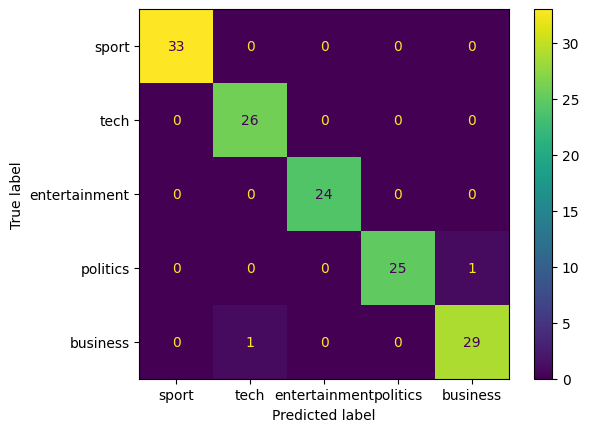

In [30]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("BERT:", accuracy)
print("Classification Report:\n", report)
id_to_label = {v: k for k, v in label_to_id.items()}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=id_to_label.values())
disp.plot()
plt.show()

#### Main Findings:

1. 99% accuracy on the predictions using BERT with batch_size = 4, learning_rate =3e-05, num_train_epochs = 4

2. learning_rate: The model does best on a medium learning rate (3e-05) than low (2e-05) or a higher one (5e-05)

3. Increasing epochs to 4 helped the model learn better document embeddings.
   


### Task 4: Discussion

#### Main conclusions from the evaluations in Tasks 1, 2 and 3:

|Task|Conclusions|
|-----|----------|
|**CountVec**| ~94% accuracy using CountVectorizer + Logistic Regression; adding bigrams further improves performance; extremely fast and easy to interpret. |
|**Doc2Vec**| ~97% accuracy with Doc2Vec (PV-DBOW, 128-dim embeddings, 60 epochs); captures the context in which the word is present, at the cost of longer training time. |
|**BERT**| ~99% accuracy by fine-tuning BERT to best parameters: learning rate 3 ×10⁻⁵, batch size 4, 4 epochs; offers best accuracy given its capability to predict masked tokens in a sentence and to predict sentence sequences but requires high compute resources. |









#### Steps taken to ensure that the models are operating correctly:

1. All experiments used stratified and standardised train/test splits to prevent class imbalance.
 
2. Using pipelines to ensure that preprocessing, vectorization/tokenization, and classification always ran in the correct order to prevent data leakage. 

3. Hyperparameters were tuned via exhaustive grid searches. Although I had to ration my CV process based on how computationally heavy it got, I am fairly happy with the accuracies I achieved. Even when we manually conduct an error analysis, it’s easy to point out that the model is getting confused between business and politics or tech and business, which is a predictable error, versus a broken code or leakage problem.

4. Fixed random seeds (random_state=42, seed=42) across all frameworks (scikit-learn, Gensim, Hugging Face) to ensure that each model’s performance was repeatable.

5. Downloaded all the required libraries to conduct these experiments progressively as I encountered errors.


The non-winning models differed by only a few tenths of a percent and had very low standard deviations across folds. This means that they too were trained correctly and their lower rankings were due to genuine, but small, performance gaps—not implementation bugs.

If I had access to a machine that could compute faster, I would do the following tests to comprehend the dynamics of hyper-parameters better:

1. Limit the vocabulary size using the vector-size hyperparameter in Doc2Vec and try to find the model that would give me a similar accuracy to the rank 1 model.

2. Dig deeper into the role of dm in Doc2Vec, examining in which classification tasks PBOW performs better than PDM.

3. Use other model names for BERT, also reducing max_length and running tests to capture the difference.

4. Running the models with different test sizes. 

My overall understanding of this task is that all the ways of vectorizing the numeric data seem to be efficient depending on the task they are going to be employed for and the access to compute resources. If we want to have a fast and simple NLP solution without getting into the semantics of the language and staying at the syntactic level, CountVectorizer with 94% accuracy is not at all bad. However, if we are looking at tasks that need some understanding of the meanings of phrases, which helps us with our sparsity problem and the database is medium-sized, I believe Doc2Vec should be the choice. BERT could be used when deep contextual understanding and capturing long range semantic dependency is absolutely essential. It is by far the most accurate, can take in huge databases but comes at a huge cost of computational resources.